In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
 import pandas as pd

# Load the original dataset
file_path = "superstore.csv"  # Update this path as needed
df = pd.read_csv(file_path)

# Remove the "记录数" column 
if "记录数" in df.columns:
    df.drop(columns=["记录数"], inplace=True)

# Apply the derived rules for "Order.Profitability"
def categorize_profit(profit):
    if profit < 0:
        return "Loss"
    elif profit < 20:
        return "Low"
    elif profit < 100:
        return "Medium"
    else:
        return "High"

df["Order.Profitability"] = df["Profit"].apply(categorize_profit)

# Apply the derived rules for "Order.Size.Category" based on Quantity
def categorize_order_size(quantity):
    if 1 <= quantity <= 2:
        return "Small Order"
    elif 3 <= quantity <= 5:
        return "Medium Order"
    else:
        return "Large Order"

df["Order.Size.Category"] = df["Quantity"].apply(categorize_order_size)

# Save the transformed dataset
df.to_csv("superstore_new.csv", index=False)

print("Transformation complete. Saved as 'superstore_updated_no_record_column.csv'.")

In [ ]:
# Load the dataset
file_path = 'superstore_updated_no_record_column.csv'  # Update this with your actual file path
df = pd.read_csv(file_path)
df.info()  # Check dataset structure
df.head()

In [ ]:
# Drop unnecessary columns
drop_columns = ['Customer.ID', 'Customer.Name', 'Order.ID', 'Product.ID', 'Product.Name', 'Order.Date', 'Ship.Date', 'Row.ID']
df_cleaned = df.drop(columns=drop_columns)

In [ ]:
# Encode categorical variables
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])
df_cleaned.head()

In [ ]:
# Define features and target variable
target_variable = 'Profit'
X = df_cleaned.drop(columns=[target_variable])
y = df_cleaned[target_variable]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

In [ ]:
# Initialize GBM models
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
lgbm = lgb.LGBMRegressor(n_estimators=100, random_state=42)
catb = cb.CatBoostRegressor(n_estimators=100, verbose=0, random_state=42)

In [ ]:
# Train models
gbm.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
catb.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_gbm = gbm.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)
y_pred_catb = catb.predict(X_test)

In [ ]:
# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'Model': model_name, 'MAE': mae, 'MSE': mse, 'R² Score': r2}

# Store results
results = [
    evaluate_model(y_test, y_pred_gbm, 'Gradient Boosting'),
    evaluate_model(y_test, y_pred_lgbm, 'LightGBM'),
    evaluate_model(y_test, y_pred_catb, 'CatBoost')
]

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

Summary
The notebook trains and evaluates Gradient Boosting, LightGBM, and CatBoost.
Model performance is measured using MAE, MSE, and R² Score.
The final comparison table provides insights into the best-performing model for regression.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             51290 non-null  object 
 1   City                 51290 non-null  object 
 2   Country              51290 non-null  object 
 3   Customer.ID          51290 non-null  object 
 4   Customer.Name        51290 non-null  object 
 5   Discount             51290 non-null  float64
 6   Market               51290 non-null  object 
 7   Order.Date           51290 non-null  object 
 8   Order.ID             51290 non-null  object 
 9   Order.Priority       51290 non-null  object 
 10  Product.ID           51290 non-null  object 
 11  Product.Name         51290 non-null  object 
 12  Profit               51290 non-null  float64
 13  Quantity             51290 non-null  int64  
 14  Region               51290 non-null  object 
 15  Row.ID         

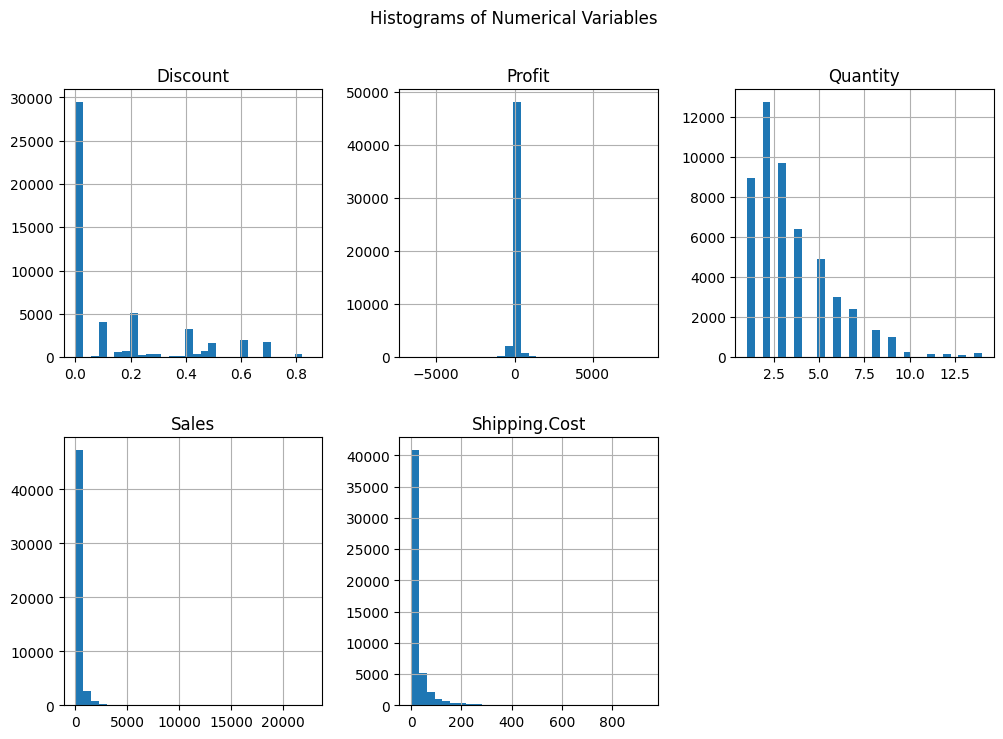

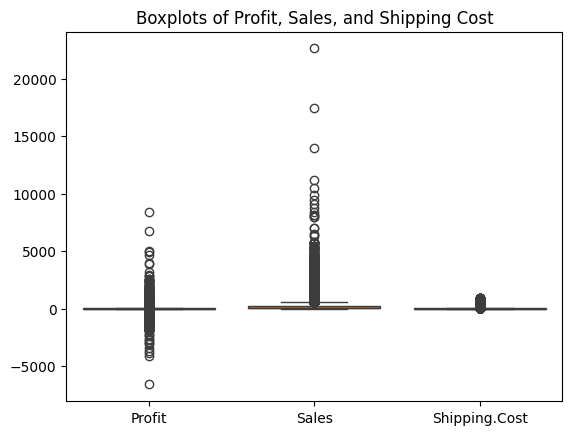

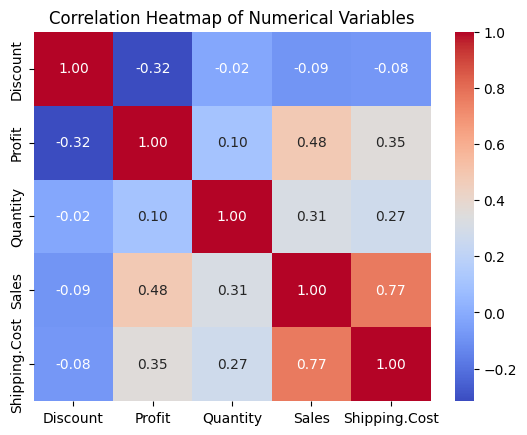

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "superstore_updated_no_record_column.csv"
df = pd.read_csv(file_path)

print("Dataset Information:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

print("\nSummary Statistics:")
print(df.describe())
print(df.head())

# Histogram for numerical variables
df[['Discount', 'Profit', 'Quantity', 'Sales', 'Shipping.Cost']].hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Boxplots to detect outliers
sns.boxplot(data=df[['Profit', 'Sales', 'Shipping.Cost']])
plt.title('Boxplots of Profit, Sales, and Shipping Cost')
plt.show()

# Correlation heatmap
sns.heatmap(df[['Discount', 'Profit', 'Quantity', 'Sales', 'Shipping.Cost']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### detect outliers using IQR

In [4]:

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for Profit, Sales, and Shipping Cost
outliers_profit = detect_outliers_iqr(df, 'Profit')
outliers_sales = detect_outliers_iqr(df, 'Sales')
outliers_shipping_cost = detect_outliers_iqr(df, 'Shipping.Cost')

print("Number of outliers in Profit:", len(outliers_profit))
print("Number of outliers in Sales:", len(outliers_sales))
print("Number of outliers in Shipping Cost:", len(outliers_shipping_cost))

Number of outliers in Profit: 9755
Number of outliers in Sales: 5655
Number of outliers in Shipping Cost: 5909


### Remove outliers

In [19]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = df.copy()
df_cleaned = remove_outliers_iqr(df_cleaned, 'Profit')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Sales')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Shipping.Cost')

print("Data shape after removing outliers:", df_cleaned.shape)
df_cleaned.to_csv('cleaned_superstore_data.csv', index=False)

Data shape after removing outliers: (27983, 33)


### K Cluster Model

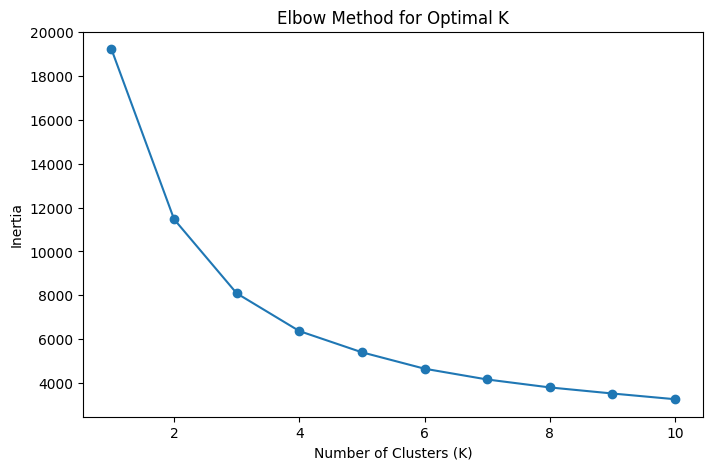

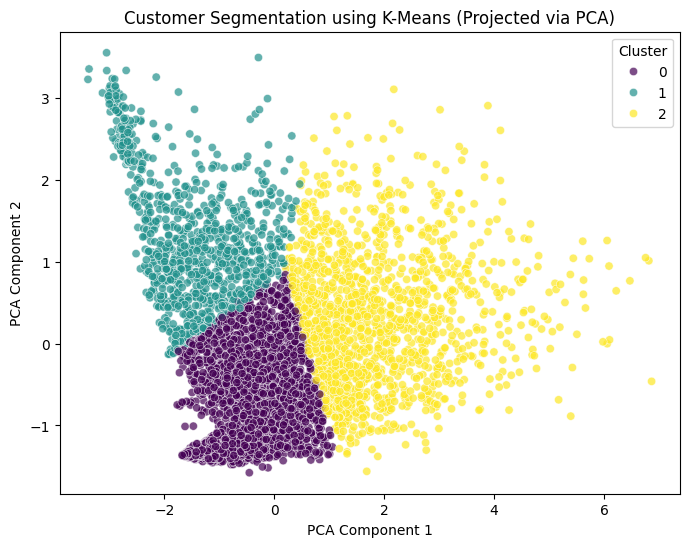

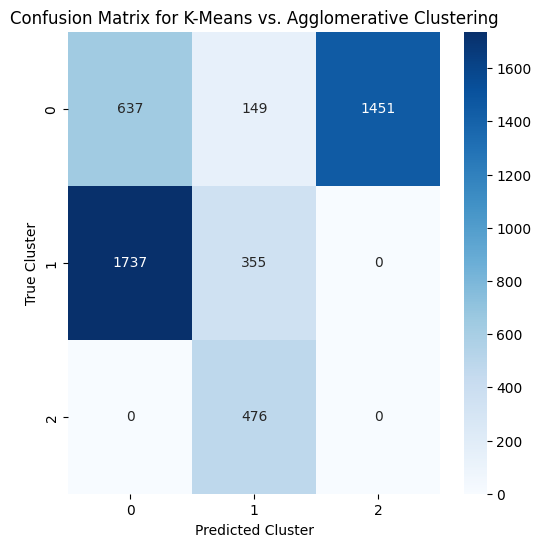

Macro Average AUC: 0.37
Macro Average Precision: 0.21
Macro Average Recall: 0.15


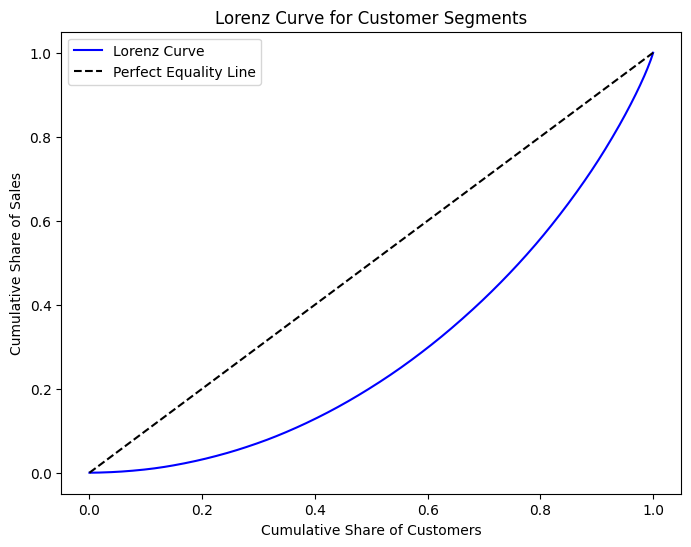

  Customer.ID  Sales   Profit  Quantity  Discount  Cluster  True_Cluster
0   AA-103151    411  -7.7040        22  0.307143        1             1
1   AA-103152    297  91.2060        19  0.071429        0             1
2   AA-103153    294  76.2600        18  0.000000        0             1
3   AA-103154    166  47.4107        19  0.057143        0             1
4   AA-103751    162  65.4000         9  0.000000        0             1


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_fscore_support
from sklearn.decomposition import PCA

customer_features = df[['Customer.ID', 'Sales', 'Profit', 'Quantity', 'Discount']]

# Aggregate by Customer ID to get total sales, profit, and quantity per customer
customer_data = customer_features.groupby('Customer.ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean'  # Average discount received per customer
}).reset_index()

# Drop Customer ID for clustering
customer_data_cluster = customer_data.drop(columns=['Customer.ID'])

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_cluster)

# Determine optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

#Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose optimal K (based on elbow curve) and train final K-Means model
optimal_k = 3  # Adjust based on elbow curve
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans_final.fit_predict(customer_data_scaled)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data_pca[:, 0], y=customer_data_pca[:, 1], hue=customer_data['Cluster'], palette='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation using K-Means (Projected via PCA)')
plt.legend(title='Cluster')
plt.show()

# Train an alternative clustering model (Agglomerative Clustering) for comparison
alt_cluster = AgglomerativeClustering(n_clusters=optimal_k)
customer_data['True_Cluster'] = alt_cluster.fit_predict(customer_data_scaled)

#Confusion Matrix
cm = confusion_matrix(customer_data['True_Cluster'], customer_data['Cluster'])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Cluster")
plt.title("Confusion Matrix for K-Means vs. Agglomerative Clustering")
plt.show()

# Binarize True Cluster labels for One-vs-Rest ROC and PR AUC
y_true_bin = label_binarize(customer_data['True_Cluster'], classes=np.unique(customer_data['True_Cluster']))
y_pred_bin = label_binarize(customer_data['Cluster'], classes=np.unique(customer_data['Cluster']))

# Compute AUC scores for each class and average them
auc_scores = []
precision_scores = []
recall_scores = []

for i in range(y_true_bin.shape[1]):  # Loop over each cluster
    auc_scores.append(roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i]))
    precision, recall, _, _ = precision_recall_fscore_support(y_true_bin[:, i], y_pred_bin[:, i], average="binary", zero_division=1)
    precision_scores.append(precision)
    recall_scores.append(recall)

#macro average AUC, Precision, and Recall
auc_macro = np.mean(auc_scores)
precision_macro = np.mean(precision_scores)
recall_macro = np.mean(recall_scores)

print(f"Macro Average AUC: {auc_macro:.2f}")
print(f"Macro Average Precision: {precision_macro:.2f}")
print(f"Macro Average Recall: {recall_macro:.2f}")

#Lorenz Curve for customer sales distribution
customer_data_sorted = customer_data.sort_values(by="Sales")
customer_data_sorted["Cumulative Sales"] = customer_data_sorted["Sales"].cumsum()
customer_data_sorted["Cumulative Share"] = customer_data_sorted["Cumulative Sales"] / customer_data_sorted["Sales"].sum()
customer_data_sorted["Cumulative Customers"] = np.linspace(0, 1, len(customer_data_sorted))

#Lorenz Curve
plt.figure(figsize=(8, 6))
plt.plot(customer_data_sorted["Cumulative Customers"], customer_data_sorted["Cumulative Share"], label="Lorenz Curve", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Perfect Equality Line")
plt.xlabel("Cumulative Share of Customers")
plt.ylabel("Cumulative Share of Sales")
plt.title("Lorenz Curve for Customer Segments")
plt.legend()
plt.show()

# Save clustered customer data
customer_data.to_csv('customer_segmentation_output.csv', index=False)

# Display first few rows of the clustered data
print(customer_data.head())

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# features for customer segmentation
customer_features = df_cleaned[['Customer.ID', 'Sales', 'Profit', 'Quantity', 'Discount']]

# Aggregate by Customer ID to get total sales, profit, and quantity per customer
customer_data = customer_features.groupby('Customer.ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean'  # Average discount received per customer
}).reset_index()

customer_data_cluster = customer_data.drop(columns=['Customer.ID'])

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_cluster)

#parameter grid for K-Means hyperparameter tuning
param_grid = {
    'n_clusters': range(2, 11),  # Trying clusters from 2 to 10
    'init': ['k-means++', 'random'],  # Initialization methods
    'n_init': [10, 20, 30],  # Number of initializations
    'max_iter': [100, 300, 500]  # Maximum iterations
}

#finding the best hyperparameters using Silhouette Score
best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for n_init in param_grid['n_init']:
            for max_iter in param_grid['max_iter']:
                kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
                cluster_labels = kmeans.fit_predict(customer_data_scaled)
                score = silhouette_score(customer_data_scaled, cluster_labels)  # Compute Silhouette Score

                if score > best_score:
                    best_score = score
                    best_params = {'n_clusters': n_clusters, 'init': init, 'n_init': n_init, 'max_iter': max_iter}

print("Best Hyperparameters:", best_params)
print(f"Best Silhouette Score: {best_score:.4f}")

best_kmeans = KMeans(**best_params, random_state=42)
customer_data['Optimized_Cluster'] = best_kmeans.fit_predict(customer_data_scaled)

customer_data.to_csv('optimized_kmeans_clusters.csv', index=False)

Best Hyperparameters: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}
Best Silhouette Score: 0.3871


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Loading the dataset with proper date parsing.
df = pd.read_csv("cleaned_superstore_data.csv",
                 parse_dates=["Order.Date", "Ship.Date"],
                 encoding="utf-8")


# Date-based features from 'Order.Date'
df["Order_Month"] = df["Order.Date"].dt.month
df["Order_Weekday"] = df["Order.Date"].dt.day_name()
df["Order_Quarter"] = df["Order.Date"].dt.quarter

# Calculate shipping duration in days.
df["Shipping_Duration"] = (df["Ship.Date"] - df["Order.Date"]).dt.days

# Profit Margin.
df["Profit_Margin"] = np.where(df["Sales"] != 0, df["Profit"] / df["Sales"], 0)

# Data Preperation
cols_to_drop = ["Customer.ID", "Customer.Name", "Order.ID", "Product.ID",
                "Product.Name", "Order.Date", "Ship.Date", "Row.ID"]
df_model = df.drop(columns=cols_to_drop)

# binary target: 1 if Sales is above the median, 0 otherwise.
median_sales = df_model["Sales"].median()
df_model["Sales_Class"] = (df_model["Sales"] > median_sales).astype(int)

df_model = df_model.drop(columns=["Sales"])

# Separate features and target variable.
X = df_model.drop("Sales_Class", axis=1)
y = df_model["Sales_Class"]

numeric_features = ["Discount", "Profit", "Quantity", "Shipping.Cost",
                    "Year", "weeknum", "Shipping_Duration", "Profit_Margin",
                    "Order_Month", "Order_Quarter"]
categorical_features = ["Category", "City", "Country", "Market", "Order.Priority",
                        "Region", "Segment", "Ship.Mode", "State", "Sub.Category",
                        "Market2", "Order_Weekday"]

In [24]:
# Creating a preprocessing pipeline.
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                   random_state=42)

In [25]:
# DT
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier:")
print("Accuracy: {:.2f}".format(acc_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("-" * 40)

# RF
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier:")
print("Accuracy: {:.2f}".format(acc_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("-" * 40)

# XGBoost
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(n_estimators=100, random_state=42, eval_metric="logloss"))
])
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier:")
print("Accuracy: {:.2f}".format(acc_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Decision Tree Classifier:
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2791
           1       0.95      0.95      0.95      2806

    accuracy                           0.95      5597
   macro avg       0.95      0.95      0.95      5597
weighted avg       0.95      0.95      0.95      5597

Confusion Matrix:
 [[2636  155]
 [ 142 2664]]
----------------------------------------
Random Forest Classifier:
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2791
           1       0.91      0.92      0.91      2806

    accuracy                           0.91      5597
   macro avg       0.91      0.91      0.91      5597
weighted avg       0.91      0.91      0.91      5597

Confusion Matrix:
 [[2534  257]
 [ 235 2571]]
----------------------------------------
XGBoost Classifier:
Accuracy: 0.99
              precision    recall  f1-score   support



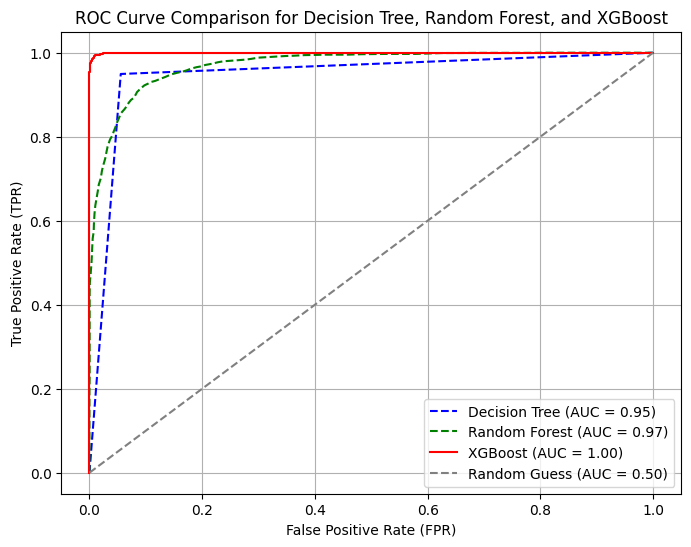

Decision Tree AUC: 0.95
Random Forest AUC: 0.97
XGBoost AUC: 1.00


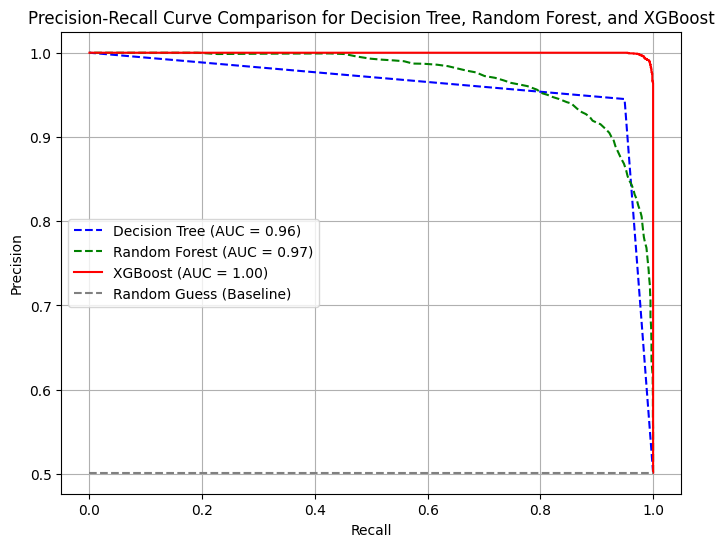

Decision Tree PR-AUC: 0.96
Random Forest PR-AUC: 0.97
XGBoost PR-AUC: 1.00


In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class (class 1)
y_prob_dt = dt_pipeline.predict_proba(X_test)[:, 1]
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", linestyle="--", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle="--", color="green")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linestyle="-", color="red")

#(AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess (AUC = 0.50)")

# Labels and title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison for Decision Tree, Random Forest, and XGBoost")
plt.legend()
plt.grid()

# Show plot
plt.show()

# Print AUC values
print(f"Decision Tree AUC: {auc_dt:.2f}")
print(f"Random Forest AUC: {auc_rf:.2f}")
print(f"XGBoost AUC: {auc_xgb:.2f}")

# Get precision-recall values for each model
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)

# Compute AUC for PR Curves
pr_auc_dt = auc(recall_dt, precision_dt)
pr_auc_rf = auc(recall_rf, precision_rf)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

# Plotting Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, label=f"Decision Tree (AUC = {pr_auc_dt:.2f})", linestyle="--", color="blue")
plt.plot(recall_rf, precision_rf, label=f"Random Forest (AUC = {pr_auc_rf:.2f})", linestyle="--", color="green")
plt.plot(recall_xgb, precision_xgb, label=f"XGBoost (AUC = {pr_auc_xgb:.2f})", linestyle="-", color="red")

# Random baseline
plt.plot([0, 1], [y_test.mean(), y_test.mean()], linestyle="--", color="gray", label="Random Guess (Baseline)")

# Labels and title
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison for Decision Tree, Random Forest, and XGBoost")
plt.legend()
plt.grid()

# Show plot
plt.show()

# Print PR-AUC values
print(f"Decision Tree PR-AUC: {pr_auc_dt:.2f}")
print(f"Random Forest PR-AUC: {pr_auc_rf:.2f}")
print(f"XGBoost PR-AUC: {pr_auc_xgb:.2f}")

In [27]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#DT
param_grid_dt = {
    "classifier__max_depth": [None, 5, 10, 15],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt,
                              cv=5, scoring="accuracy", n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
best_dt = grid_search_dt.best_estimator_

# test and evaluate
y_pred_dt_best = best_dt.predict(X_test)
acc_dt_best = accuracy_score(y_test, y_pred_dt_best)
print("Decision Tree (Tuned) Accuracy: {:.2f}".format(acc_dt_best))
print(classification_report(y_test, y_pred_dt_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_best))
print("-" * 40)

# RF
param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf,
                              cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

# test and evaluate
y_pred_rf_best = best_rf.predict(X_test)
acc_rf_best = accuracy_score(y_test, y_pred_rf_best)
print("Random Forest (Tuned) Accuracy: {:.2f}".format(acc_rf_best))
print(classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))
print("-" * 40)

# XGBoost
param_grid_xgb = {
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7],
    "classifier__n_estimators": [50, 100, 200]
}

grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb,
                               cv=5, scoring="accuracy", n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best params for XGBoost:", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_

# test and evaluate
y_pred_xgb_best = best_xgb.predict(X_test)
acc_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
print("XGBoost (Tuned) Accuracy: {:.2f}".format(acc_xgb_best))
print(classification_report(y_test, y_pred_xgb_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_best))
print("-" * 40)

Best params for Decision Tree: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Decision Tree (Tuned) Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2791
           1       0.95      0.95      0.95      2806

    accuracy                           0.95      5597
   macro avg       0.95      0.95      0.95      5597
weighted avg       0.95      0.95      0.95      5597

Confusion Matrix:
 [[2658  133]
 [ 152 2654]]
----------------------------------------
Best params for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Random Forest (Tuned) Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2791
           1       0.91      0.92      0.91      2806

    accuracy                           0.91    

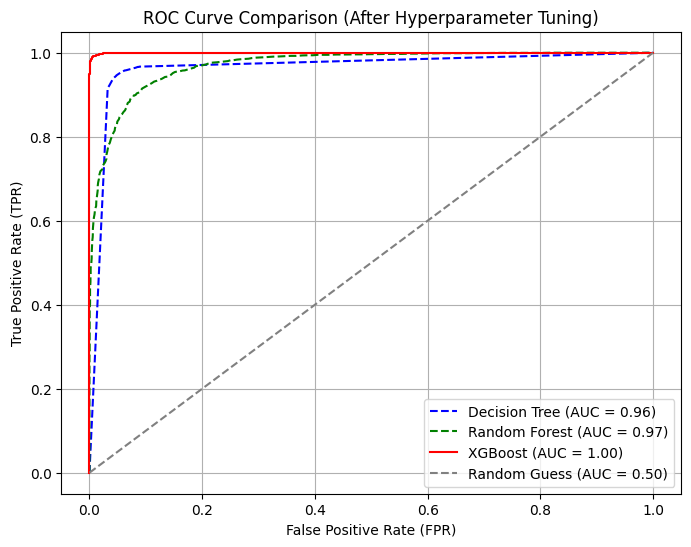

Decision Tree AUC (Tuned): 0.96
Random Forest AUC (Tuned): 0.97
XGBoost AUC (Tuned): 1.00


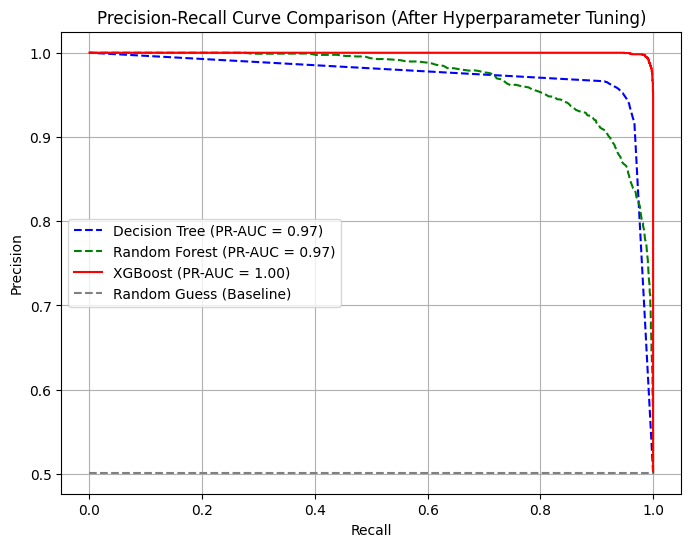

Decision Tree PR-AUC (Tuned): 0.97
Random Forest PR-AUC (Tuned): 0.97
XGBoost PR-AUC (Tuned): 1.00


In [28]:
# ROC, PROC, AUC after tuning

# Get predicted probabilities for the positive class (class 1) after tuning
y_prob_dt_best = best_dt.predict_proba(X_test)[:, 1]
y_prob_rf_best = best_rf.predict_proba(X_test)[:, 1]
y_prob_xgb_best = best_xgb.predict_proba(X_test)[:, 1]


fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt_best)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf_best)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb_best)

auc_dt_best = auc(fpr_dt, tpr_dt)
auc_rf_best = auc(fpr_rf, tpr_rf)
auc_xgb_best = auc(fpr_xgb, tpr_xgb)

# ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt_best:.2f})", linestyle="--", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf_best:.2f})", linestyle="--", color="green")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb_best:.2f})", linestyle="-", color="red")

# Baseline (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess (AUC = 0.50)")


plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (After Hyperparameter Tuning)")
plt.legend()
plt.grid()
plt.show()

# Print AUC values
print(f"Decision Tree AUC (Tuned): {auc_dt_best:.2f}")
print(f"Random Forest AUC (Tuned): {auc_rf_best:.2f}")
print(f"XGBoost AUC (Tuned): {auc_xgb_best:.2f}")

# PR-ROC Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt_best)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf_best)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb_best)

# PR-AUC for each model
pr_auc_dt_best = auc(recall_dt, precision_dt)
pr_auc_rf_best = auc(recall_rf, precision_rf)
pr_auc_xgb_best = auc(recall_xgb, precision_xgb)


plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, label=f"Decision Tree (PR-AUC = {pr_auc_dt_best:.2f})", linestyle="--", color="blue")
plt.plot(recall_rf, precision_rf, label=f"Random Forest (PR-AUC = {pr_auc_rf_best:.2f})", linestyle="--", color="green")
plt.plot(recall_xgb, precision_xgb, label=f"XGBoost (PR-AUC = {pr_auc_xgb_best:.2f})", linestyle="-", color="red")

# Random baseline (horizontal line at the positive class ratio)
plt.plot([0, 1], [y_test.mean(), y_test.mean()], linestyle="--", color="gray", label="Random Guess (Baseline)")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison (After Hyperparameter Tuning)")
plt.legend()
plt.grid()
plt.show()

# PR-AUC values
print(f"Decision Tree PR-AUC (Tuned): {pr_auc_dt_best:.2f}")
print(f"Random Forest PR-AUC (Tuned): {pr_auc_rf_best:.2f}")
print(f"XGBoost PR-AUC (Tuned): {pr_auc_xgb_best:.2f}")